In [ ]:
!pip install pandas numpy scikit-learn nltk matplotlib seaborn

In [ ]:
import pandas as pd

# Example: Loading a CSV dataset
data = pd.read_excel("/content/drive/MyDrive/Internship CipherBytes/Spam_Email_Detection.xlsx")

In [ ]:
data = data.rename(columns={'v1': 'label', 'v2': 'message'})
data = data.dropna()
df = pd.DataFrame(data)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['label'])
y = data['label'].map({'ham': 0, 'spam': 1})


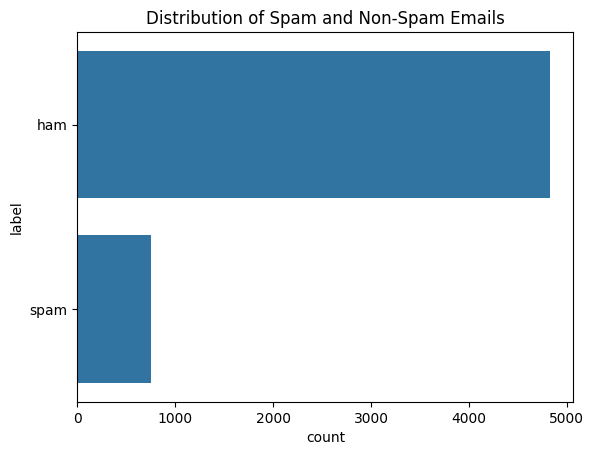

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data['label'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()


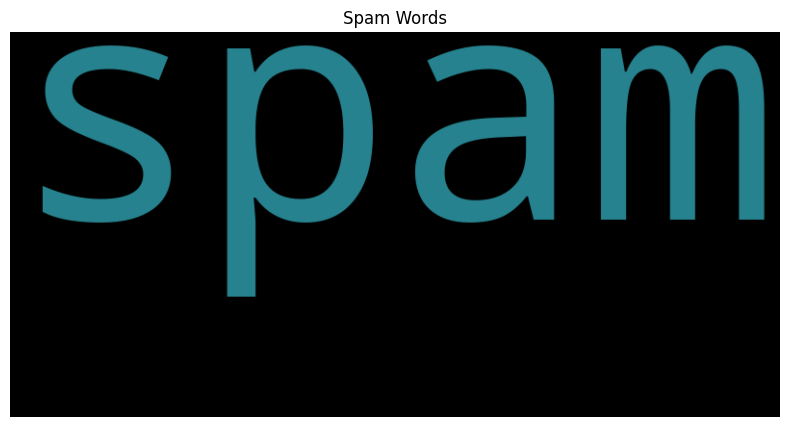

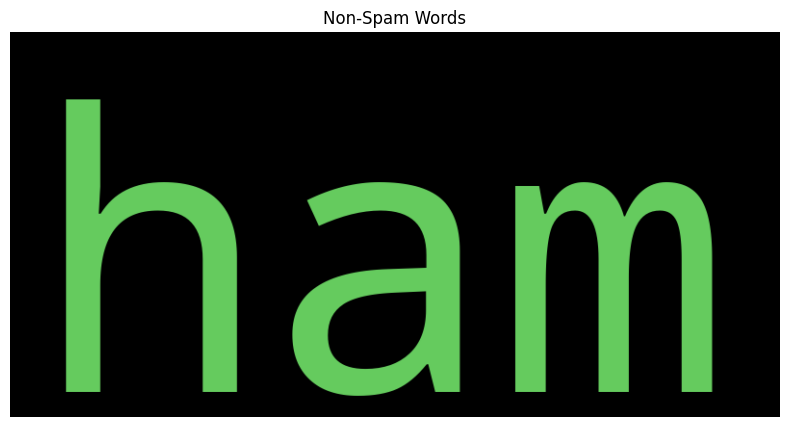

In [ ]:
spam_words = ' '.join(list(data[data['label'] == 'spam']['label']))
non_spam_words = ' '.join(list(data[data['label'] == 'ham']['label']))

from wordcloud import WordCloud

spam_wc = WordCloud(width=800, height=400).generate(spam_words)
non_spam_wc = WordCloud(width=800, height=400).generate(non_spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(non_spam_wc, interpolation='bilinear')
plt.title('Non-Spam Words')
plt.axis('off')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} trained.")


Naive Bayes trained.
SVM trained.
Random Forest trained.
Logistic Regression trained.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluation for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:")
    print(roc_auc_score(y_test, y_pred))
    print("\n")


Evaluation for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       1.00      1.00      1.00       150

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115

Confusion Matrix:
[[965   0]
 [  0 150]]
ROC AUC Score:
1.0


Evaluation for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       1.00      1.00      1.00       150

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115

Confusion Matrix:
[[965   0]
 [  0 150]]
ROC AUC Score:
1.0


Evaluation for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       1.00      1.00  

In [ ]:
import joblib

joblib.dump(models['Naive Bayes'], 'spam_detector_model.pkl')

['spam_detector_model.pkl']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the labels (ham: 0, spam: 1)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_train)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.9692618353152345
Precision: 0.9956896551724138
Recall: 0.7738693467336684
F1-Score: 0.8708765315739868


In [ ]:
def predict_spam(email):
    email_tfidf = vectorizer.transform([email])
    prediction = model.predict(email_tfidf)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example prediction
new_email = "Congratulations! You've won a free ticket to Bahamas. Call 123456 to claim now."
print(predict_spam(new_email))

Spam
